In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [20]:
# Load dataset
df = pd.read_csv("/content/spam.csv")

In [28]:
print(df.columns)

Index(['Category', 'Message', 'spam'], dtype='object')


In [21]:
# Check dataset structure
print(df.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [22]:
# Encode 'Category' column (spam = 1, ham = 0)
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [23]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['spam'], test_size=0.2, random_state=42)


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
clf = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])


In [30]:
# Train the model
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(stop_words='english')),
                ('nb', MultinomialNB())])

In [31]:
# Evaluate model on test data
y_pred = clf.predict(X_test)
print("Model Performance:\n", classification_report(y_test, y_pred))

Model Performance:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.97      0.93      0.95       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [32]:
# Test with sample emails
emails = [
    'Hey Mohan, can we get together to watch the football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Don’t miss this reward!'
]

predictions = clf.predict(emails)
print("Predictions:", predictions)  # Output will be [0, 1] (ham, spam)

Predictions: [0 1]


In [33]:
emails = [
    'Hey Mohan, can we get together to watch the football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Don’t miss this reward!'
]
print(clf.predict_proba(emails))  # Check probability distribution
print(clf.predict(emails))  # Check final predictions


[[0.9985669  0.0014331 ]
 [0.17646895 0.82353105]]
[0 1]


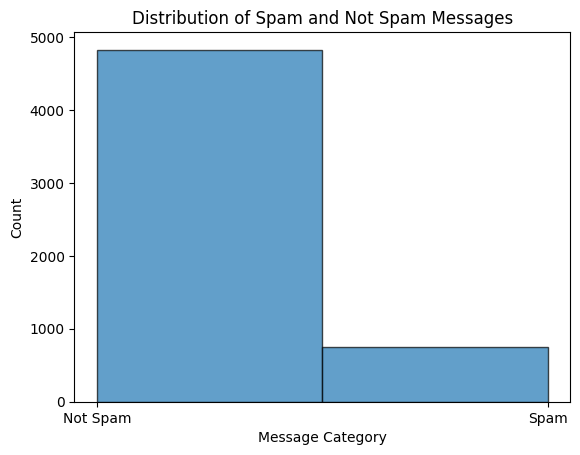

In [34]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(df['spam'], bins=2, edgecolor='black', alpha=0.7)
plt.xticks([0, 1], labels=['Not Spam', 'Spam'])
plt.xlabel('Message Category')
plt.ylabel('Count')
plt.title('Distribution of Spam and Not Spam Messages')
plt.show()
